In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv(r"C:\Users\goex1\Desktop\DS Projekte für GITHUB\Customer Segmentation\customer_segmentation.csv")

'''Features:
    Id: Unique identifier for each individual in the dataset.
    Year_Birth: The birth year of the individual.
    Education: The highest level of education attained by the individual.
    Marital_Status: The marital status of the individual.
    Income: The annual income of the individual.
    Kidhome: The number of young children in the household.
    Teenhome: The number of teenagers in the household.
    Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.
    Recency: The number of days since the last purchase or interaction.
    MntWines: The amount spent on wines.
    MntFruits: The amount spent on fruits.
    MntMeatProducts: The amount spent on meat products.
    MntFishProducts: The amount spent on fish products.
    MntSweetProducts: The amount spent on sweet products.
    MntGoldProds: The amount spent on gold products.
    NumDealsPurchases: The number of purchases made with a discount or as part of a deal.
    NumWebPurchases: The number of purchases made through the company's website.
    NumCatalogPurchases: The number of purchases made through catalogs.
    NumStorePurchases: The number of purchases made in physical stores.
    NumWebVisitsMonth: The number of visits to the company's website in a month.
    AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
    AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
    AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
    AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
    AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
    Complain: Binary indicator (1 or 0) whether the individual has made a complaint.
    Z_CostContact: A constant cost associated with contacting a customer.
    Z_Revenue: A constant revenue associated with a successful campaign response.
    Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.#
'''

df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Preprocessing

In [5]:
#na-Values in dataset?

df.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [6]:
print(df['Income'].median())

51381.5


In [7]:
#Show Data with Income = NaN
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [8]:
#Replace missing values ​​with median.

df.loc[[10,27,43,48,58,71,90,91,92,128,133,312,319,1379,1382,1383,1386,2059,2061,2078,2079,2081,2084,2228],'Income'] = 51381.5


In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
df[df['Income']==666666.000000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0


In [11]:
#Delete outlier
df=df.drop(df.index[2233])

### NA-Values?

In [12]:
df.count()

ID                     2239
Year_Birth             2239
Education              2239
Marital_Status         2239
Income                 2239
Kidhome                2239
Teenhome               2239
Dt_Customer            2239
Recency                2239
MntWines               2239
MntFruits              2239
MntMeatProducts        2239
MntFishProducts        2239
MntSweetProducts       2239
MntGoldProds           2239
NumDealsPurchases      2239
NumWebPurchases        2239
NumCatalogPurchases    2239
NumStorePurchases      2239
NumWebVisitsMonth      2239
AcceptedCmp3           2239
AcceptedCmp4           2239
AcceptedCmp5           2239
AcceptedCmp1           2239
AcceptedCmp2           2239
Complain               2239
Z_CostContact          2239
Z_Revenue              2239
Response               2239
dtype: int64

# Identify outliers grafically

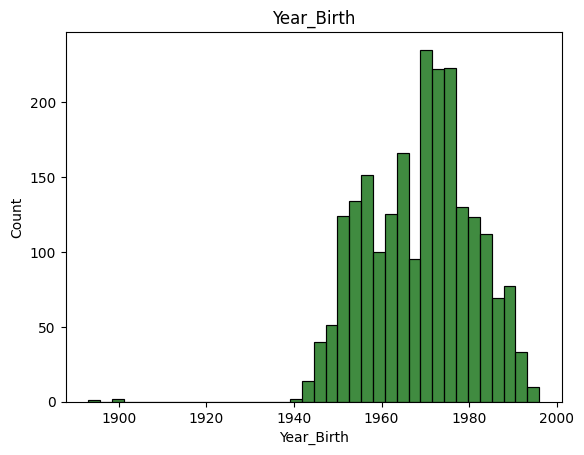

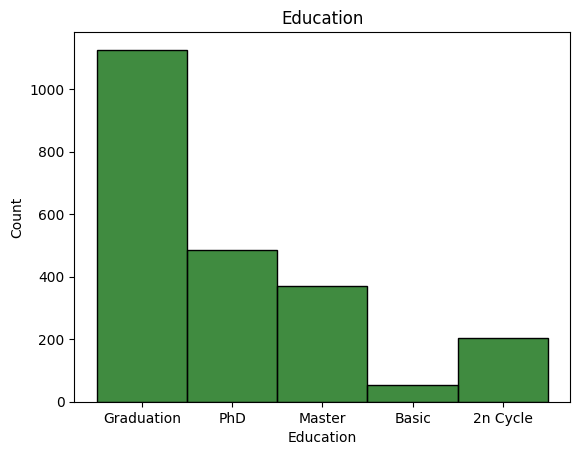

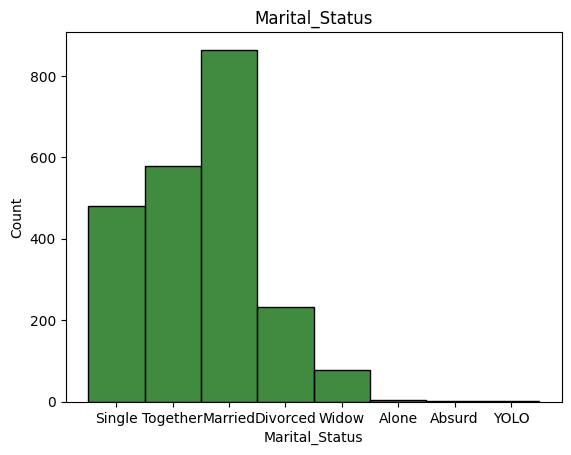

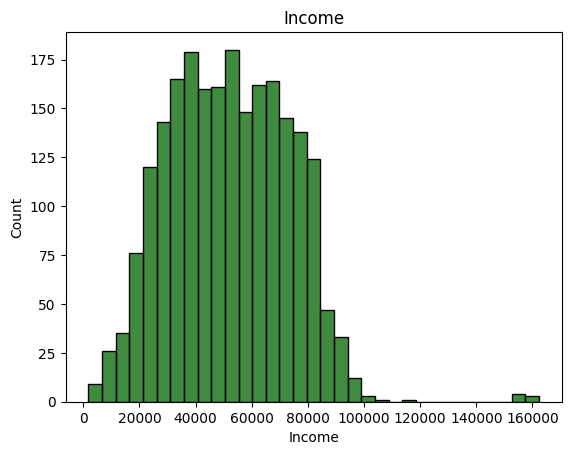

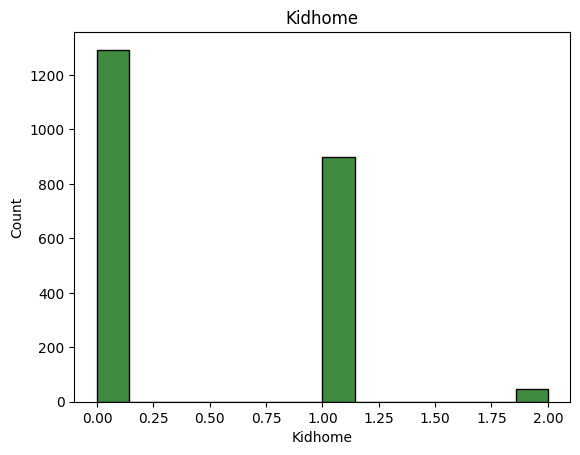

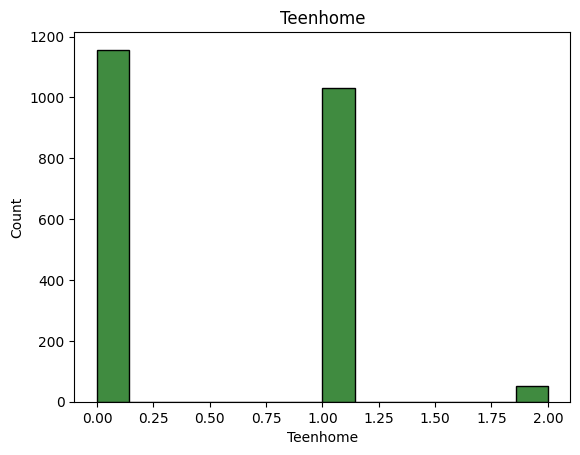

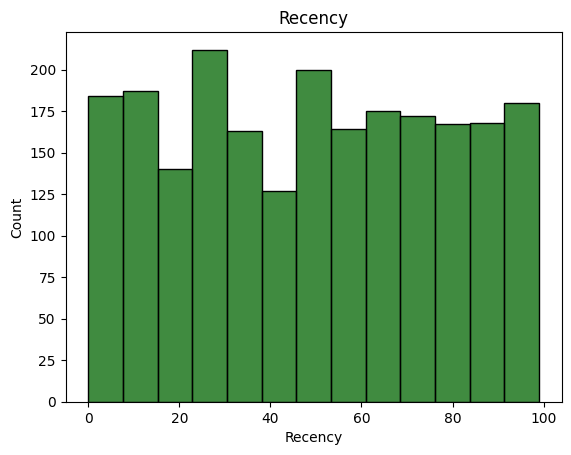

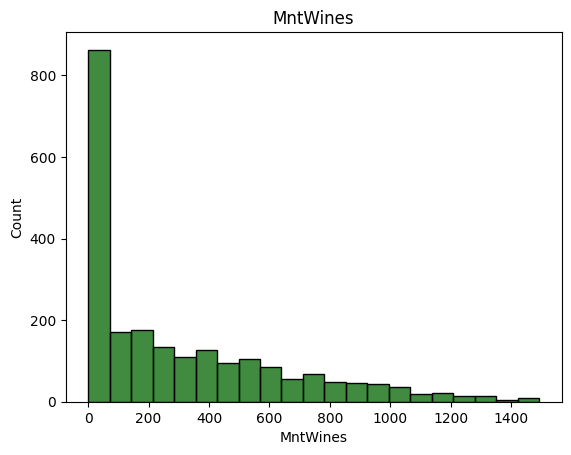

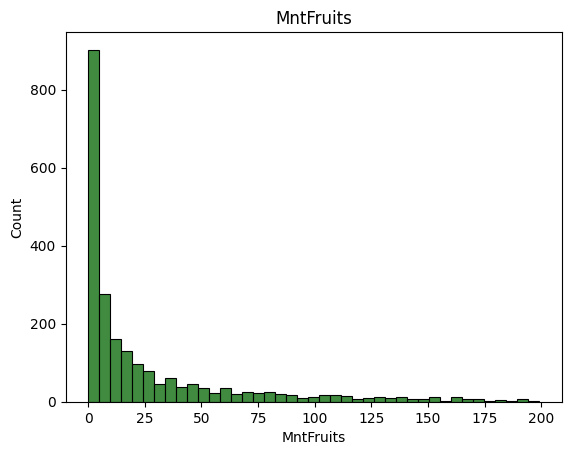

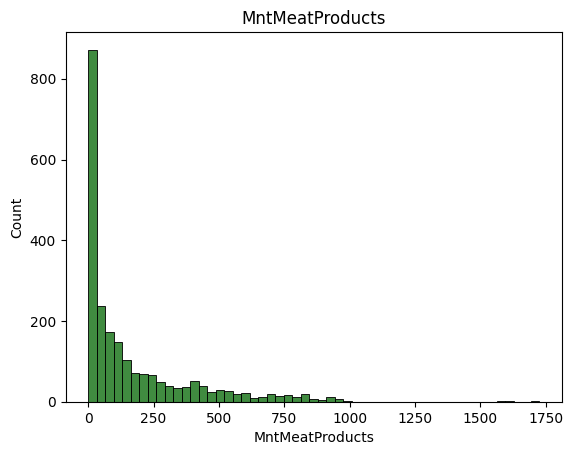

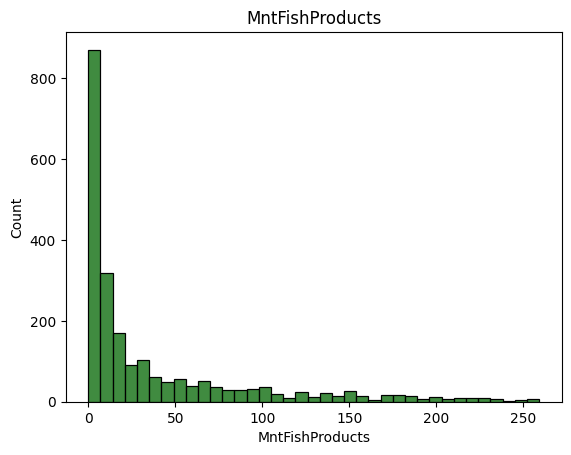

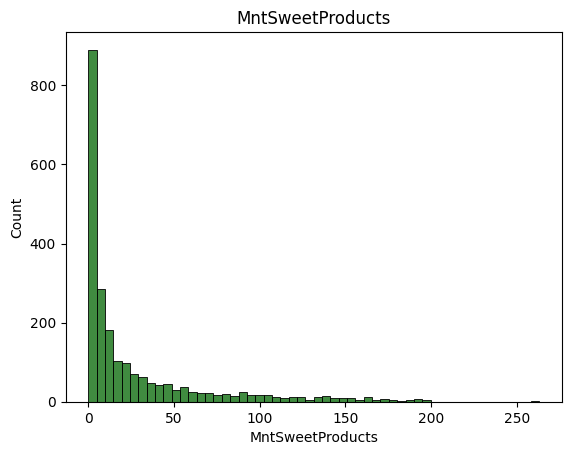

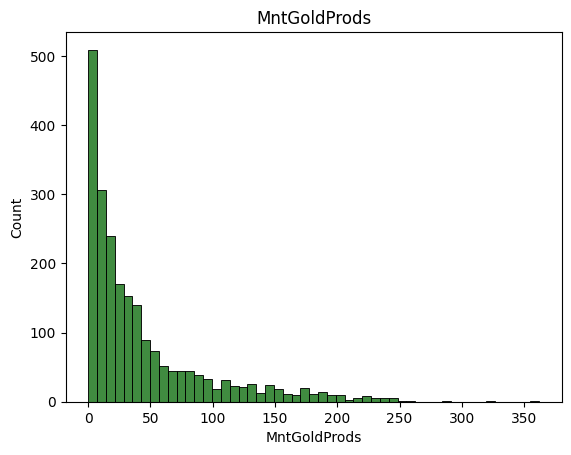

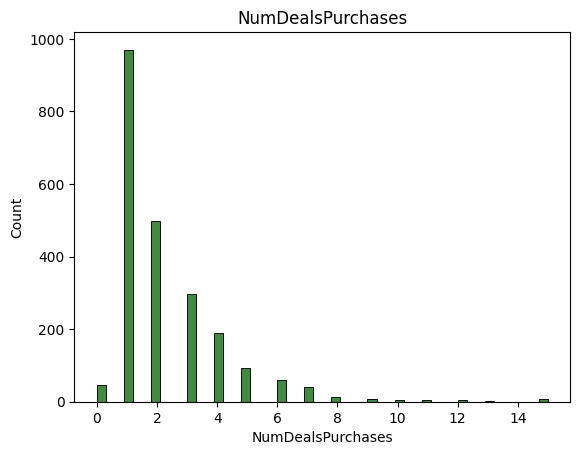

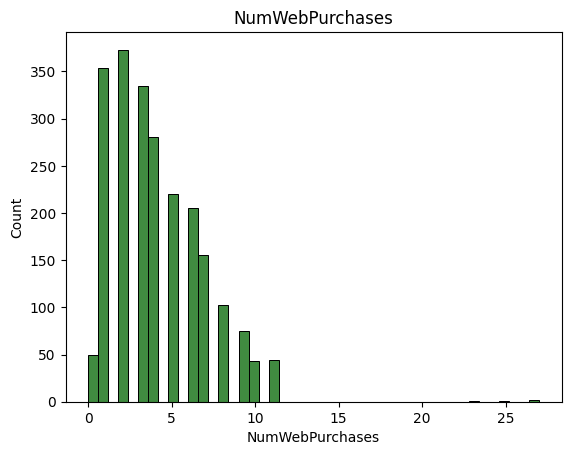

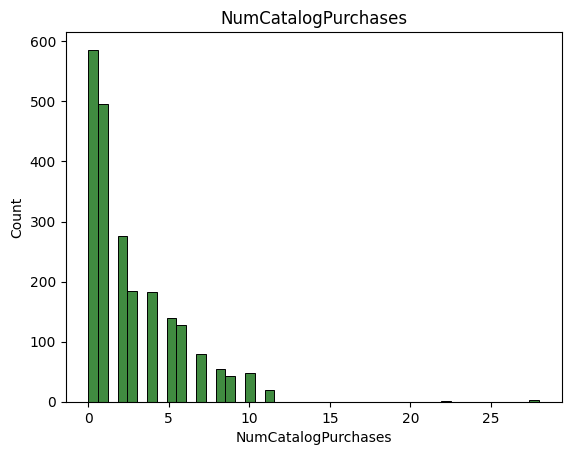

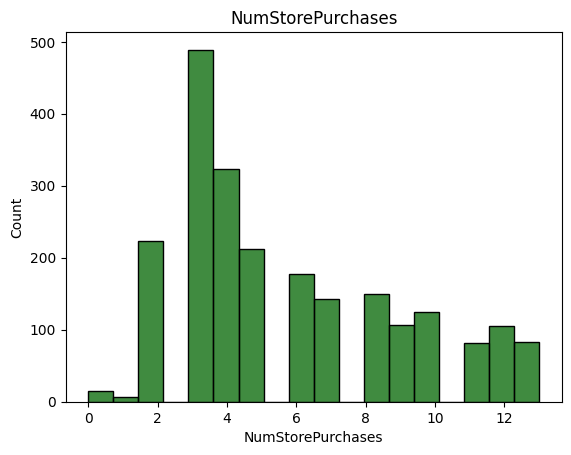

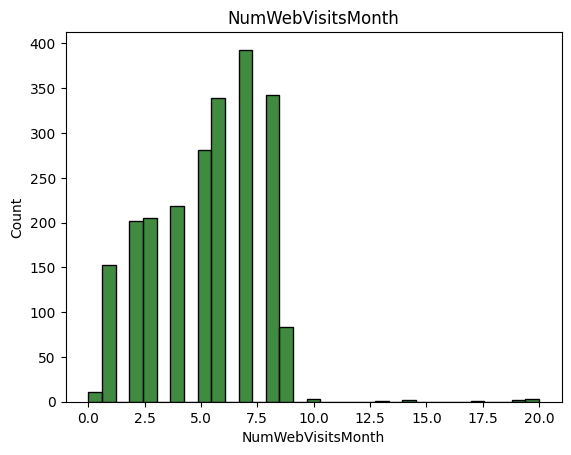

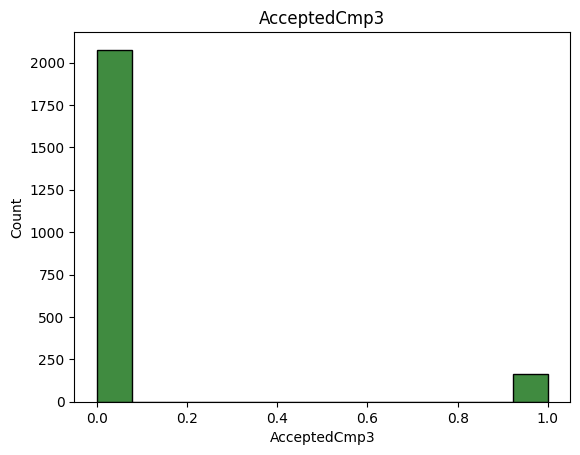

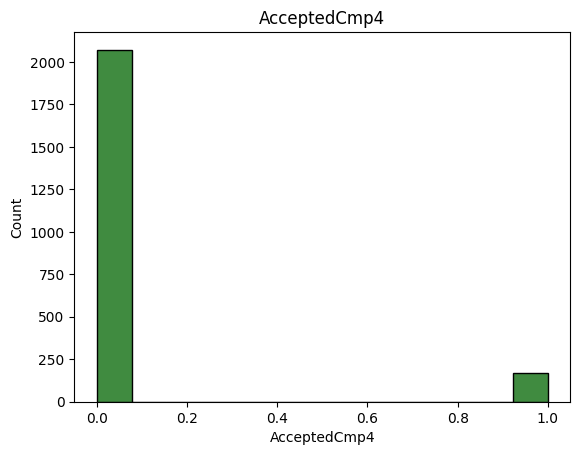

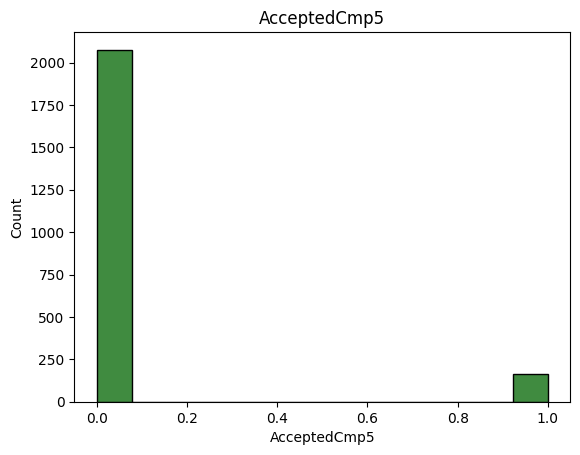

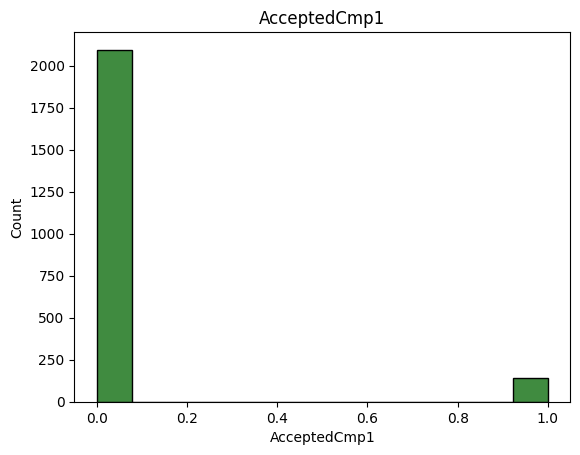

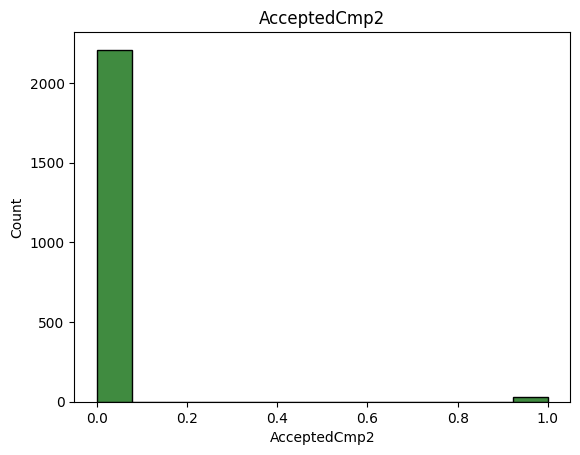

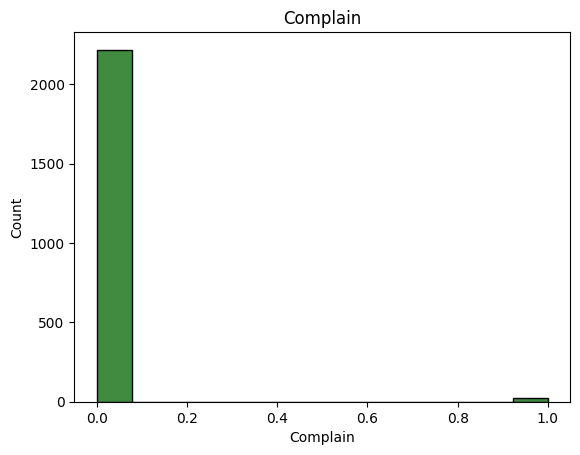

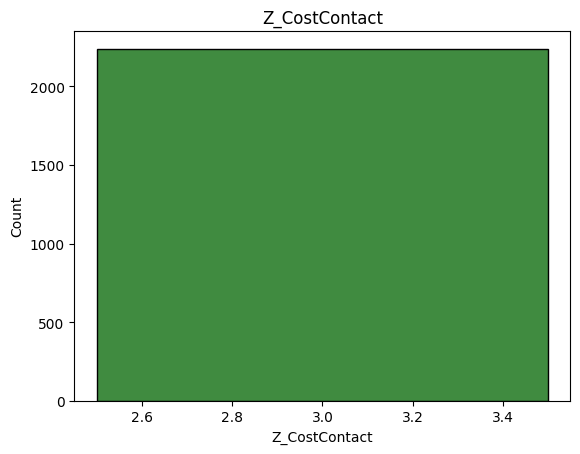

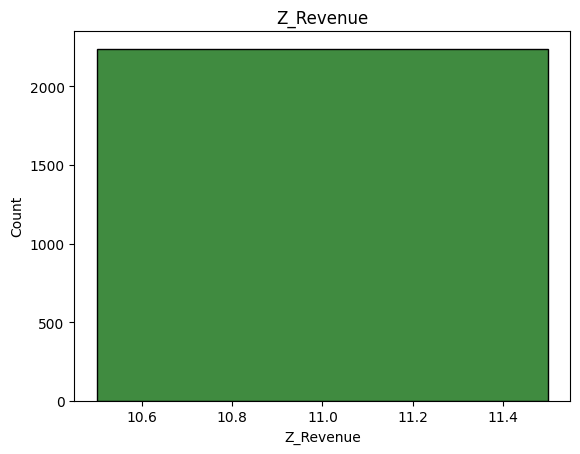

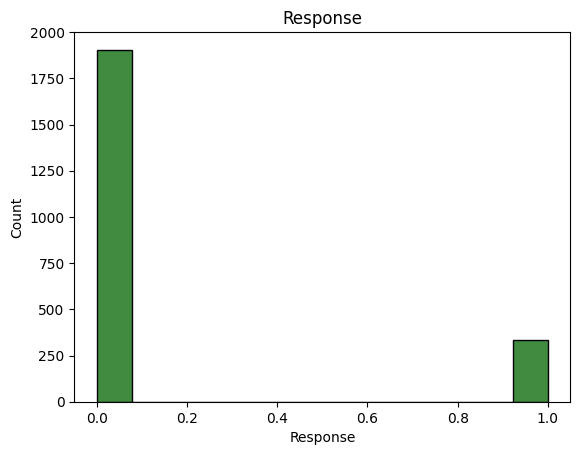

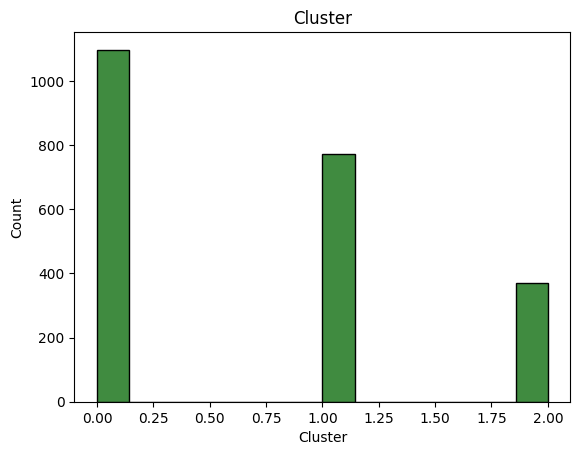

In [20]:
exclude_cols = ["ID", "Dt_Customer"]

for variable in df:
    if not variable in exclude_cols:
        sns.histplot(df,x=variable,color='darkgreen')
        plt.title(f'{variable}')
        plt.show()

### K-Means Clustering

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Income', 'MntWines']])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [15]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,1


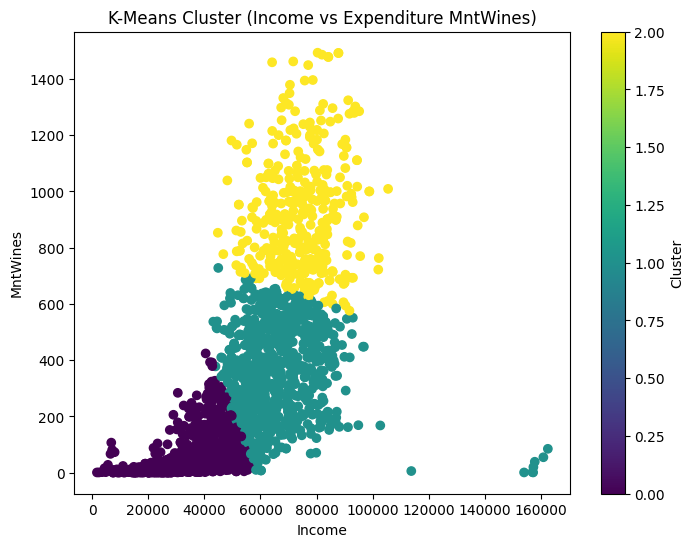

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Income'], df['MntWines'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('K-Means Cluster (Income vs Expenditure MntWines)')
plt.colorbar(label='Cluster')
plt.show()

### Fazit: Die K-Means-Clusteranalyse mit k=3 identifiziert drei klar unterscheidbare Kundensegmente.Ein Cluster umfasst Kunden mit niedrigem Einkommen und geringen Weinausgaben, ein zweites Cluster beschreibt Kunden mit moderatem Konsum, während das dritte Cluster Kunden mit überdurchschnittlichen Weinausgaben repräsentiert. Die Ergebnisse deuten darauf hin, dass insbesondere das Konsumverhalten und nicht ausschließlich das Einkommen zur Segmentierung beiträgt.“